## Introduction

In [112]:
from fastai.imports import *
np.set_printoptions(linewidth=130)

## Data preprocessing

In [113]:
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

df = pd.read_csv('/kaggle/input/train_dataset.csv')
tst_df = pd.read_csv('/kaggle/input/test_dataset.csv')

In [ ]:
Two notebooks were chosen to be uploaded, one with normalization and another without, in order to compare the results.
The value without normalization is included in this notebook.


In [114]:
def proc_data(df):
    df.columns = [col.replace(' ', '_').lower() for col in df.columns]
#     columns_to_log = df.columns[(df > 10).any()]
#     df[columns_to_log + "_log"] = np.where(df[columns_to_log] > 10, np.log(df[columns_to_log]), df[columns_to_log])
#     df.drop(columns=columns_to_log, inplace=True)
    return df

# Copiando o DataFrame original
old_df = df.copy()

# Chamando a função para modificar o DataFrame original
df = proc_data(df)
tst_df = proc_data(tst_df)

In [115]:
errors = {}
df

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,dental_caries,smoking
0,35,170,85,97.0,0.9,0.9,1,1,118,78,...,70,142,19.8,1,1.0,61,115,125,1,1
1,20,175,110,110.0,0.7,0.9,1,1,119,79,...,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,...,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,...,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,...,47,92,14.9,1,1.2,26,28,15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38979,40,165,60,80.0,0.4,0.6,1,1,107,60,...,61,72,12.3,1,0.5,18,18,21,1,0
38980,45,155,55,75.0,1.5,1.2,1,1,126,72,...,76,131,12.5,2,0.6,23,11,12,0,0
38981,40,170,105,124.0,0.6,0.5,1,1,141,85,...,48,138,17.1,1,0.8,24,23,35,1,1
38982,40,160,55,75.0,1.5,1.5,1,1,95,69,...,79,116,12.0,1,0.6,24,20,17,0,1


Aqui estão as traduções para os parâmetros mencionados:

* 'eyesight(left)': Visão (olho esquerdo)
* 'eyesight(right)': Visão (olho direito)
* 'hearing(left)': Audição (ouvido esquerdo)
* 'hearing(right)': Audição (ouvido direito)
* 'Urine protein': Proteína na urina
* 'dental caries': Cáries dentárias
* 'smoking': Fumante
* 'age_log': Logaritmo da idade
* 'height(cm)_log': Logaritmo da altura (em centímetros)
* 'weight(kg)_log': Logaritmo do peso (em quilogramas)
* 'waist(cm)_log': Logaritmo da circunferência da cintura (em centímetros)
* 'systolic_log': Logaritmo da pressão arterial sistólica
* 'relaxation_log': Logaritmo da pressão arterial diastólica
* 'fasting blood sugar_log': Logaritmo da glicose em jejum
* 'Cholesterol_log': Logaritmo do colesterol total
* 'triglyceride_log': Logaritmo dos triglicerídeos
* 'HDL_log': Logaritmo do colesterol HDL
* 'LDL_log': Logaritmo do colesterol LDL
* 'hemoglobin_log': Logaritmo da hemoglobina
* 'serum creatinine_log': Logaritmo da creatinina sérica
* 'AST_log': Logaritmo da enzima AST
* 'ALT_log': Logaritmo da enzima ALT
* 'Gtp_log': Logaritmo da enzima GTP (ou GTT)

In [116]:
dep="smoking"

## Binary splits

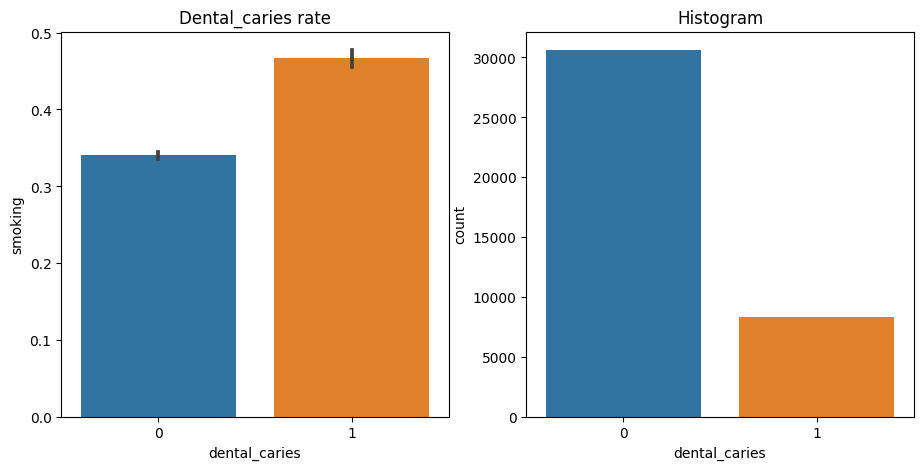

In [117]:
import seaborn as sns

fig,axs = plt.subplots(1,2, figsize=(11,5))
sns.barplot(data=df, y=dep, x="dental_caries", ax=axs[0]).set(title="Dental_caries rate")
sns.countplot(data=df, x="dental_caries", ax=axs[1]).set(title="Histogram");

In [118]:
from numpy import random
from sklearn.model_selection import train_test_split

random.seed(42)
trn_df,val_df = train_test_split(df, test_size=0.25)

In [119]:
def xs_y(df, dep):
    xs = df.drop("smoking", axis=1).copy()  # Remove a coluna "smoking"
    return xs, df[dep] if dep in df else None

trn_xs, trn_y = xs_y(trn_df, dep)
val_xs, val_y = xs_y(val_df, dep)

modelo onde todos que tem carie, são fumantes

In [120]:
preds = val_xs.dental_caries==1

In [121]:
preds

22014    False
8979      True
9517     False
9003     False
33220    False
         ...  
14612    False
3469      True
10798     True
22539     True
3706      True
Name: dental_caries, Length: 9746, dtype: bool

We'll use mean absolute error to measure how good this model is:

In [122]:
from sklearn.metrics import mean_absolute_error
absolute_error = mean_absolute_error(val_y, preds)
errors.update({"dental_caries_model":absolute_error})
absolute_error

0.3793351118407552

In [123]:
df['waist(cm)']

0         97.0
1        110.0
2         86.0
3         94.0
4         81.0
         ...  
38979     80.0
38980     75.0
38981    124.0
38982     75.0
38983     81.1
Name: waist(cm), Length: 38984, dtype: float64

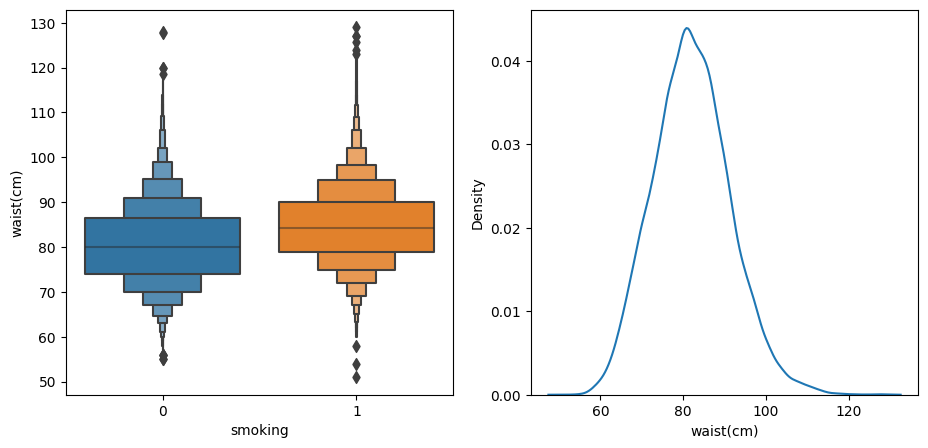

In [124]:
df_creatine = trn_df[trn_df['waist(cm)']>0]
fig,axs = plt.subplots(1,2, figsize=(11,5))
sns.boxenplot(data=df_creatine, x=dep, y="waist(cm)", ax=axs[0])
sns.kdeplot(data=df_creatine, x="waist(cm)", ax=axs[1]);

In [125]:
preds = val_xs['waist(cm)']>84

In [126]:
errors.update({"waist(cm)>84":mean_absolute_error(val_y, preds)})

In [127]:
def _side_score(side, y):
    tot = side.sum()
    if tot<=1: return 0
    return y[side].std()*tot

In [128]:
def score(col, y, split):
    lhs = col<=split
    return (_side_score(lhs,y) + _side_score(~lhs,y))/len(y)

In [129]:
score(trn_xs["dental_caries"], trn_y, 0.5)

0.4793934469075377

In [130]:
nm = "age"
col = trn_xs[nm]
unq = col.unique()
unq.sort()
unq

array([20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85])

In [131]:
scores = np.array([score(col, trn_y, o) for o in unq if not np.isnan(o)])
unq[scores.argmin()]

35

In [132]:
def min_col(df, nm):
    col,y = df[nm],df[dep]
    unq = col.dropna().unique()
    scores = np.array([score(col, y, o) for o in unq if not np.isnan(o)])
    idx = scores.argmin()
    return unq[idx],scores[idx]

In [133]:
cols = df.columns.difference(['smoking'])
{o:min_col(trn_df, o) for o in cols}

{'age': (35, 0.47601659328698714),
 'alt': (21, 0.4740711509433565),
 'ast': (23, 0.48019809696244514),
 'cholesterol': (156, 0.48189401578165825),
 'dental_caries': (0, 0.4793934469075377),
 'eyesight(left)': (0.9, 0.4804808398383178),
 'eyesight(right)': (0.8, 0.4798831654551002),
 'fasting_blood_sugar': (100, 0.48013342762109606),
 'gtp': (24, 0.45383676589376254),
 'hdl': (53, 0.4742566087307179),
 'hearing(left)': (1, 0.48204718763574333),
 'hearing(right)': (1, 0.48209327502081),
 'height(cm)': (160, 0.43353413736129315),
 'hemoglobin': (13.9, 0.4359567398877451),
 'ldl': (71, 0.48126143704034086),
 'relaxation': (69, 0.4792678220673881),
 'serum_creatinine': (0.7, 0.4627730365115033),
 'systolic': (109, 0.47987997317084957),
 'triglyceride': (113, 0.4703123820329382),
 'urine_protein': (2, 0.4821296228772214),
 'waist(cm)': (75.3, 0.4713430241996106),
 'weight(kg)': (60, 0.45919539664893533)}

## Creating a decision tree

In [134]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

m = DecisionTreeClassifier(max_leaf_nodes=5).fit(trn_xs, trn_y);

One handy feature or this class is that it provides a function for drawing a tree representing the rules:

In [135]:
import graphviz

def draw_tree(t, df, size=10, ratio=0.6, precision=2, **kwargs):
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True, rounded=True,
                      special_characters=True, rotate=False, precision=precision, **kwargs)
    return graphviz.Source(re.sub('Tree {', f'Tree {{ size={size}; ratio={ratio}', s))

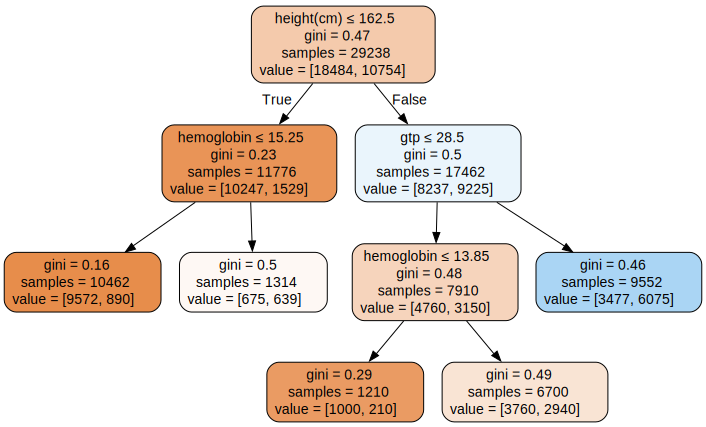

In [136]:
draw_tree(m, trn_xs, size=10)

In [137]:
def gini(cond):
    act = df.loc[cond, dep]
    return 1 - act.mean()**2 - (1-act).mean()**2

In [138]:
error = mean_absolute_error(val_y, m.predict(val_xs))
errors.update({"decision_tree_simple":error})
error

0.2803201313359327

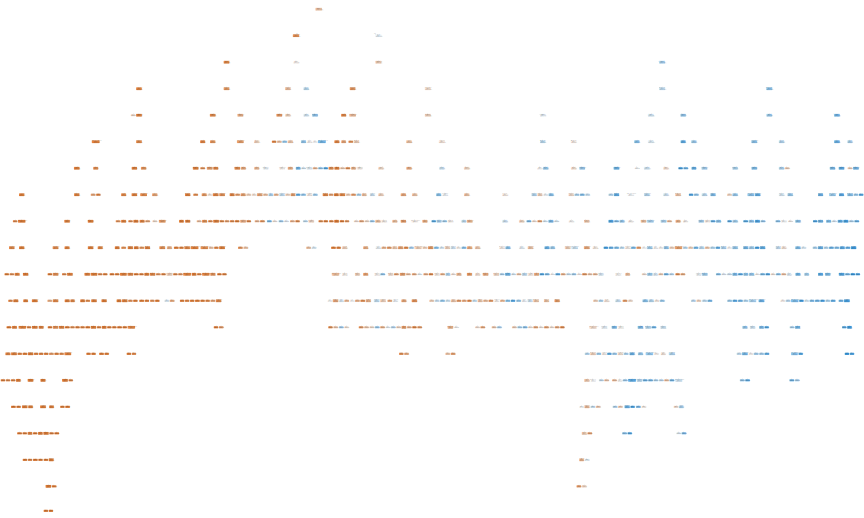

In [139]:
m = DecisionTreeClassifier(min_samples_leaf=50)
m.fit(trn_xs, trn_y)
draw_tree(m, trn_xs, size=12)

In [140]:
error = mean_absolute_error(val_y, m.predict(val_xs))
errors.update({"decision_tree_50_leafs":error})
error

0.2809357685204186

## The random forest

In [141]:
def get_tree(prop=0.75):
    n = len(trn_y)
    idxs = random.choice(n, int(n*prop))
    return DecisionTreeClassifier(min_samples_leaf=5).fit(trn_xs.iloc[idxs], trn_y.iloc[idxs])

In [142]:
trees = [get_tree() for t in range(100)]

This is nearly identical to what `sklearn`'s `RandomForestClassifier` does. The main extra piece in a "real" random forest is that as well as choosing a random sample of data for each tree, it also picks a random subset of columns for each split. Here's how we repeat the above process with a random forest:

In [143]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(100, min_samples_leaf=5)
rf.fit(trn_xs, trn_y);
error = mean_absolute_error(val_y, rf.predict(val_xs))
errors.update({"RandomForestClassifier-100-5":error})
error

0.20993227990970656

In [144]:
rf = RandomForestClassifier(200, min_samples_leaf=5)
rf.fit(trn_xs, trn_y);
error = mean_absolute_error(val_y, rf.predict(val_xs))
errors.update({"RandomForestClassifier-200-5":error})
error

0.2109583418838498

In [145]:
rf = RandomForestClassifier(100, min_samples_leaf=1)
rf.fit(trn_xs, trn_y);
error = mean_absolute_error(val_y, rf.predict(val_xs))
errors.update({"RandomForestClassifier-200-5":error})
error

0.20357069567001848

In [146]:
rf = RandomForestClassifier(200, min_samples_leaf=1)
rf.fit(trn_xs, trn_y);
error = mean_absolute_error(val_y, rf.predict(val_xs))
errors.update({"RandomForestClassifier-200-1":error})
error

0.20121075312948902

In [147]:
rf = RandomForestClassifier(100, min_samples_leaf=10)
rf.fit(trn_xs, trn_y);
error = mean_absolute_error(val_y, rf.predict(val_xs))
errors.update({"RandomForestClassifier-100-10":error})
error

0.22542581571926945

In [148]:
rf = RandomForestClassifier(200, min_samples_leaf=10)
rf.fit(trn_xs, trn_y);
error = mean_absolute_error(val_y, rf.predict(val_xs))
errors.update({"RandomForestClassifier-200-10":error})
error

0.2248101785347835

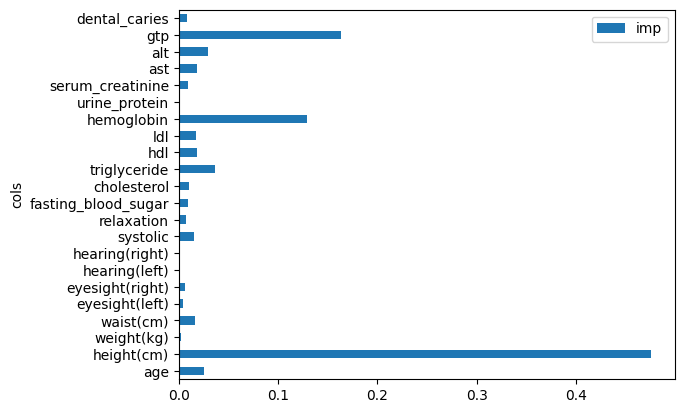

In [149]:
pd.DataFrame(dict(cols=trn_xs.columns, imp=m.feature_importances_)).plot('cols', 'imp', 'barh');

## Conclusion

In [150]:
errors

{'dental_caries_model': 0.3793351118407552,
 'waist(cm)>84': 0.3862097270675149,
 'decision_tree_simple': 0.2803201313359327,
 'decision_tree_50_leafs': 0.2809357685204186,
 'RandomForestClassifier-100-5': 0.20993227990970656,
 'RandomForestClassifier-200-5': 0.20357069567001848,
 'RandomForestClassifier-200-1': 0.20121075312948902,
 'RandomForestClassifier-100-10': 0.22542581571926945,
 'RandomForestClassifier-200-10': 0.2248101785347835}

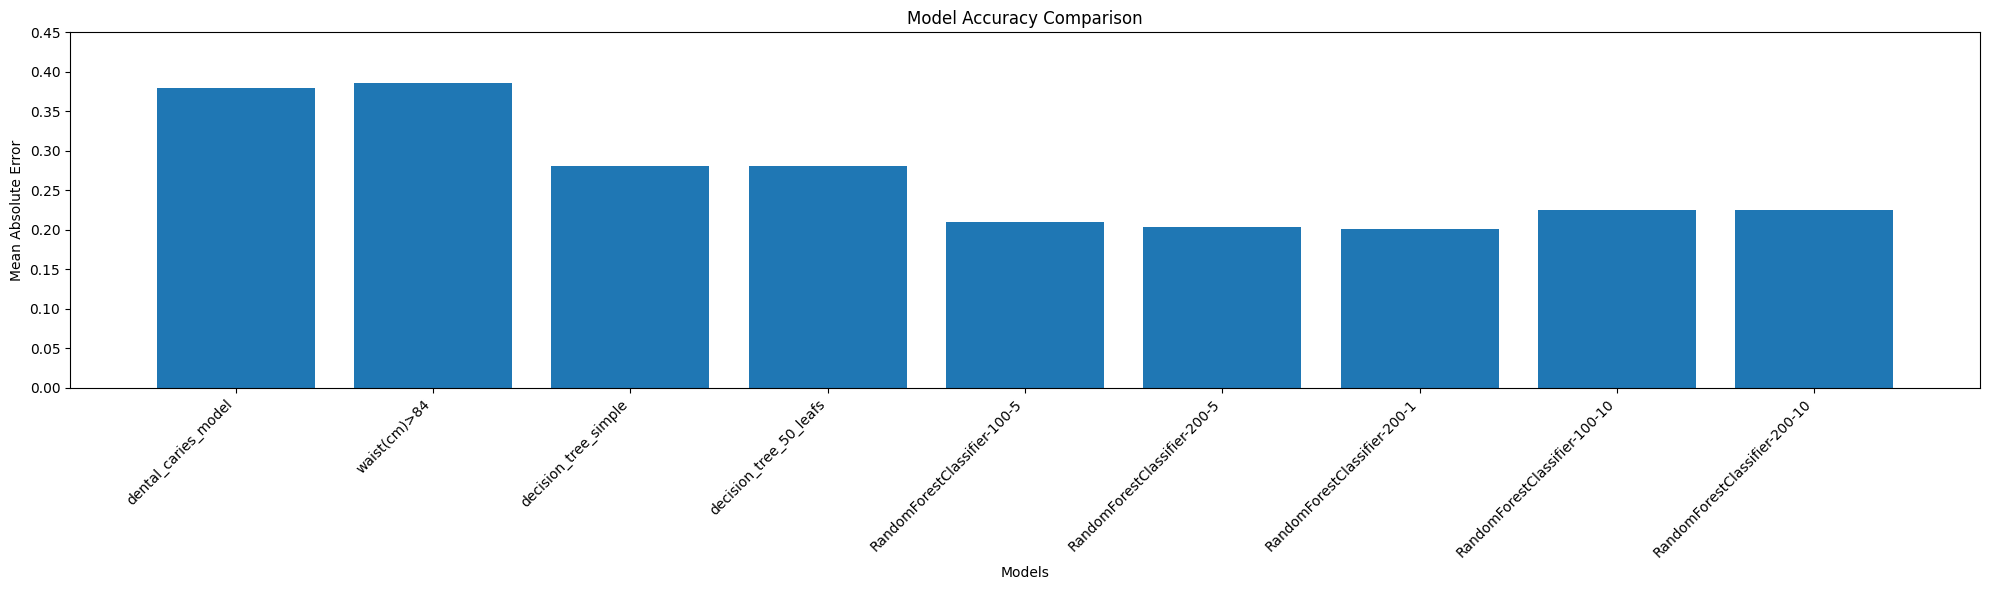

In [151]:
import matplotlib.pyplot as plt

# Your dictionary
# Extract keys and values
labels = list(errors.keys())
values = list(errors.values())

# Plotting with rotated labels
plt.figure(figsize=(20, 6))
plt.bar(labels, values)
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error')
plt.title('Model Accuracy Comparison')

# Rotate X-axis labels for better readability
plt.xticks(rotation=45, ha='right')  # Adjust the rotation angle as needed

plt.ylim(0, 0.45)  # Adjust the y-axis limit if needed
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [152]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(rf, f)